In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

170498071/170498071 [==============================] - 12s 0us/step


In [7]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

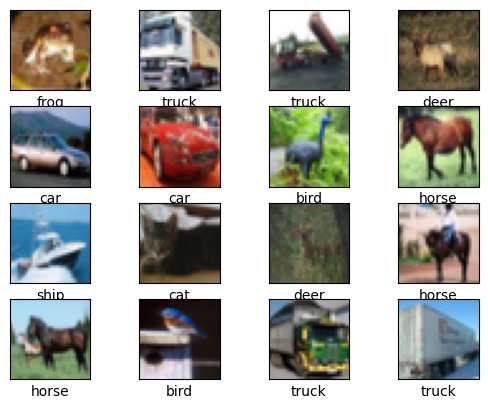

In [8]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [12]:
# model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5187 - accuracy: 0.4462 - val_loss: 1.3317 - val_accuracy: 0.5203
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1532 - accuracy: 0.5903 - val_loss: 1.0781 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0056 - accuracy: 0.6484 - val_loss: 0.9942 - val_accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9058 - accuracy: 0.6827 - val_loss: 0.9416 - val_accuracy: 0.6741
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8344 - accuracy: 0.7070 - val_loss: 0.8830 - val_accuracy: 0.6934
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7758 - accuracy: 0.7274 - val_loss: 0.9128 - val_accuracy: 0.6861
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7311 - accuracy: 0.7433 - val_loss: 0.8966 -

In [14]:
# model.save("tf_trained_net_model")

INFO:tensorflow:Assets written to: tf_trained_net\assets


INFO:tensorflow:Assets written to: tf_trained_net\assets


In [15]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.8635 - accuracy: 0.7091
Loss: 0.8634923100471497
Accuracy: 0.7091000080108643


In [16]:
model = models.load_model("tf_trained_net_model")

1/1 [==============================] - 0s 17ms/step
Prediction: frog
1/1 [==============================] - 0s 15ms/step
Prediction: ship
1/1 [==============================] - 0s 15ms/step
Prediction: horse


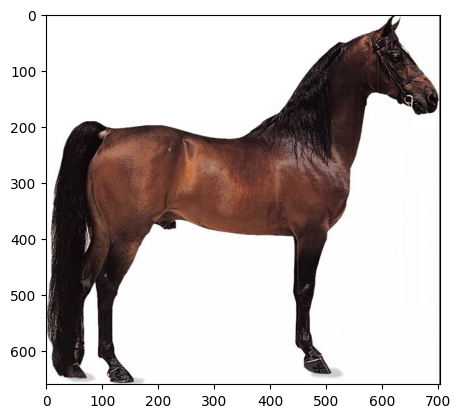

In [21]:
def new_transform(image):
    """didn't use this function, need retrain refactory the Datasets transform. If do so I think can spped up the traning speeds."""
    image = tf.image.resize(image, [32, 32])
    # convert to tensor and scale to [0, 1]
    image = tf.cast(image, tf.float32)/255.0
    # normalize
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]
    image = (iamge - mean) / std
    return image
    
def load_image(image_path):
    img = cv.imread(image_path) # cv read img as BGR format not RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img, cmap=plt.cm.binary)
    img = tf.image.resize(img, [32, 32])
    img = np.array([img]) / 255
    return img
# Note png is 4 channels, jpg is 3 channels.
image_paths = ["example3.jpg", "example2.jpg", "example.jpg"]
images = [load_image(img) for img in image_paths]
for image in images:
    prediction = model.predict(image)
    index = np.argmax(prediction)
    print(f"Prediction: {class_names[index]}")

